In [2]:
# 小米SU7微博数据 - 分布与重复数据分析
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用已更新点赞数的数据
DATA_ROOT = 'D:/010_CodePrograms/L/LLM_su7/小米SU7数据_2'
RESULTS_DIR = 'D:/010_CodePrograms/L/LLM_su7/results'
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"数据目录: {DATA_ROOT}")

数据目录: D:/010_CodePrograms/L/LLM_su7/小米SU7数据_2


In [3]:
# 1. 加载所有数据
# ============================================
print("=" * 60)
print("【加载数据】")
print("=" * 60)

# 加载热门微博数据
weibo_files = glob(f'{DATA_ROOT}/*/热门微博.csv')
weibo_list = []
for f in weibo_files:
    df = pd.read_csv(f, encoding='utf-8-sig')
    df['crawl_date'] = os.path.basename(os.path.dirname(f))
    weibo_list.append(df)
weibo_df = pd.concat(weibo_list, ignore_index=True)

# 加载评论数据
comment_files = glob(f'{DATA_ROOT}/*/热门微博评论数据.csv')
comments_list = []
for f in comment_files:
    df = pd.read_csv(f, encoding='utf-8-sig')
    df['crawl_date'] = os.path.basename(os.path.dirname(f))
    comments_list.append(df)
comments_df = pd.concat(comments_list, ignore_index=True)

# 加载转发数据
repost_files = glob(f'{DATA_ROOT}/*/热门微博转发数据.csv')
reposts_list = []
for f in repost_files:
    try:
        df = pd.read_csv(f, encoding='utf-8-sig')
        df['crawl_date'] = os.path.basename(os.path.dirname(f))
        reposts_list.append(df)
    except Exception as e:
        print(f"读取失败: {f}, 错误: {e}")
reposts_df = pd.concat(reposts_list, ignore_index=True)

print(f"热门微博: {len(weibo_df):,} 条")
print(f"评论数据: {len(comments_df):,} 条")
print(f"转发数据: {len(reposts_df):,} 条")

print(f"\n热门微博列: {list(weibo_df.columns)}")
print(f"评论数据列: {list(comments_df.columns)}")
print(f"转发数据列: {list(reposts_df.columns)}")

【加载数据】


热门微博: 7,215 条
评论数据: 273,975 条
转发数据: 26,359 条

热门微博列: ['author_name', 'author_url', 'weibo_url', 'publish_time', 'weibo_content', 'repost_count', 'comment_count', 'like_count', 'crawl_date']
评论数据列: ['原文链接', '根评论ID', '父评论ID', '评论ID', '用户ID', '父用户昵称', '用户昵称', '评论内容', '发布时间', '子评论数', '点赞数', '用户认证', '用户总评论数', '用户总转发数', '用户总点赞数', '是否是一级评论', 'crawl_date']
转发数据列: ['原文链接', '原创/转发', '标题', '原文作者', '全文内容', '根标题', '根微博作者', '原微博内容', '发布时间', '转发数', '评论数', '点赞数', '用户认证', '用户总评论数', '用户总转发数', '用户总点赞数', 'crawl_date']


In [4]:
# 2. 数据基本统计
# ============================================
print("=" * 60)
print("【数据基本统计】")
print("=" * 60)

# 热门微博统计
print("\n--- 热门微博数据 ---")
print(weibo_df[['repost_count', 'comment_count', 'like_count']].describe())

# 检查点赞数是否已更新
print(f"\n点赞数有效(>0)记录数: {(weibo_df['like_count'] > 0).sum():,} / {len(weibo_df):,}")
print(f"点赞数为NaN记录数: {weibo_df['like_count'].isna().sum():,}")

# 评论统计
print("\n--- 评论数据 ---")
print(comments_df[['子评论数', '点赞数']].describe())
print(f"\n评论点赞数有效(>0)记录数: {(comments_df['点赞数'] > 0).sum():,} / {len(comments_df):,}")
print(f"评论点赞数为NaN记录数: {comments_df['点赞数'].isna().sum():,}")

# 转发统计
print("\n--- 转发数据 ---")
print(reposts_df[['转发数', '评论数', '点赞数']].describe())

【数据基本统计】

--- 热门微博数据 ---
       repost_count  comment_count     like_count
count   7215.000000    7215.000000    5198.000000
mean      22.127512     116.809148     898.453251
std      105.150493     420.538107    5635.088383
min        0.000000       0.000000       1.000000
25%        1.000000      14.000000      51.000000
50%        5.000000      36.000000     138.000000
75%       17.000000      89.000000     361.000000
max     4843.000000   11169.000000  152351.000000

点赞数有效(>0)记录数: 5,198 / 7,215
点赞数为NaN记录数: 2,017

--- 评论数据 ---
                子评论数            点赞数
count  273975.000000  203961.000000
mean        0.776691       2.568388
std        12.790823     110.768393
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max      2606.000000   29471.000000

评论点赞数有效(>0)记录数: 21,724 / 273,975
评论点赞数为NaN记录数: 70,014

--- 转发数据 ---
                转发数           评论数           点赞数
count  26359.000000  26

【热门微博指标分布可视化】
有效点赞数记录: 5,198 条


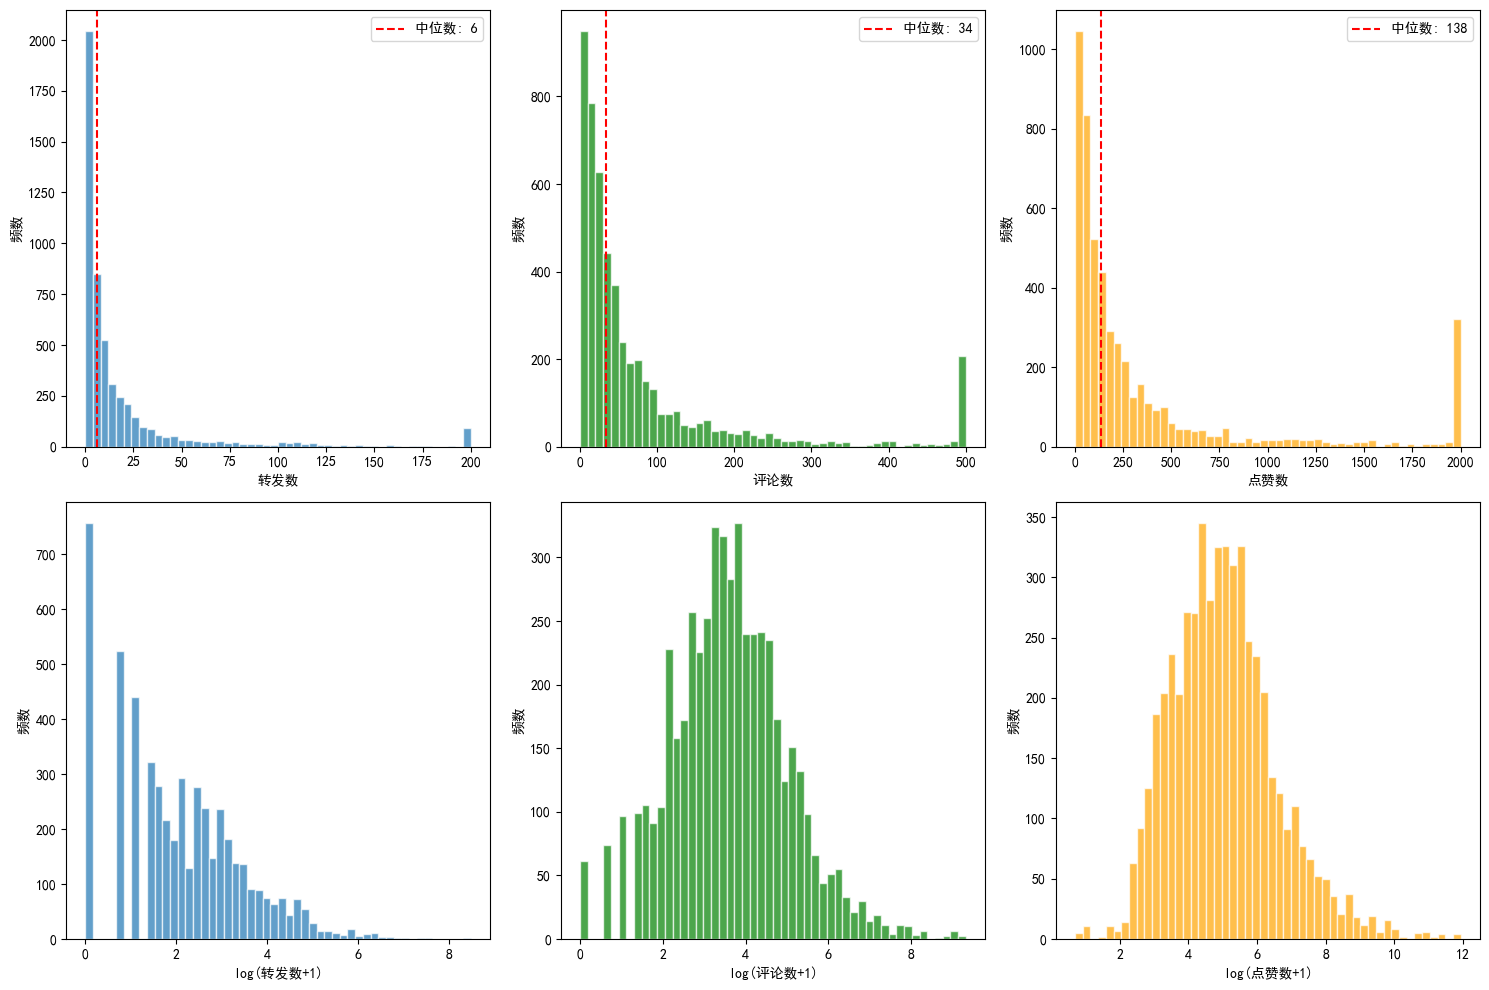

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/weibo_metrics_distribution.png


In [5]:
# 3. 可视化转发数、评论数、点赞数分布
# ============================================
print("=" * 60)
print("【热门微博指标分布可视化】")
print("=" * 60)

# 去除NaN值用于可视化
weibo_valid = weibo_df.dropna(subset=['like_count'])
print(f"有效点赞数记录: {len(weibo_valid):,} 条")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 第一行：原始分布（直方图）
# 转发数分布
ax = axes[0, 0]
ax.hist(weibo_valid['repost_count'].clip(upper=200), bins=50, edgecolor='white', alpha=0.7)
ax.set_xlabel('转发数')
ax.set_ylabel('频数')
ax.axvline(weibo_valid['repost_count'].median(), color='red', linestyle='--', label=f'中位数: {weibo_valid["repost_count"].median():.0f}')
ax.legend()

# 评论数分布
ax = axes[0, 1]
ax.hist(weibo_valid['comment_count'].clip(upper=500), bins=50, edgecolor='white', alpha=0.7, color='green')
ax.set_xlabel('评论数')
ax.set_ylabel('频数')
ax.axvline(weibo_valid['comment_count'].median(), color='red', linestyle='--', label=f'中位数: {weibo_valid["comment_count"].median():.0f}')
ax.legend()

# 点赞数分布
ax = axes[0, 2]
ax.hist(weibo_valid['like_count'].clip(upper=2000), bins=50, edgecolor='white', alpha=0.7, color='orange')
ax.set_xlabel('点赞数')
ax.set_ylabel('频数')
ax.axvline(weibo_valid['like_count'].median(), color='red', linestyle='--', label=f'中位数: {weibo_valid["like_count"].median():.0f}')
ax.legend()

# 第二行：对数分布（log scale）
# 转发数对数分布
ax = axes[1, 0]
repost_log = np.log1p(weibo_valid['repost_count'])
ax.hist(repost_log, bins=50, edgecolor='white', alpha=0.7)
ax.set_xlabel('log(转发数+1)')
ax.set_ylabel('频数')

# 评论数对数分布
ax = axes[1, 1]
comment_log = np.log1p(weibo_valid['comment_count'])
ax.hist(comment_log, bins=50, edgecolor='white', alpha=0.7, color='green')
ax.set_xlabel('log(评论数+1)')
ax.set_ylabel('频数')

# 点赞数对数分布
ax = axes[1, 2]
like_log = np.log1p(weibo_valid['like_count'])
ax.hist(like_log, bins=50, edgecolor='white', alpha=0.7, color='orange')
ax.set_xlabel('log(点赞数+1)')
ax.set_ylabel('频数')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/weibo_metrics_distribution.png', dpi=200, bbox_inches='tight')
plt.show()
print(f"图表已保存至 {RESULTS_DIR}/weibo_metrics_distribution.png")

【评论数据指标分布】
有效点赞数评论: 203,961 条


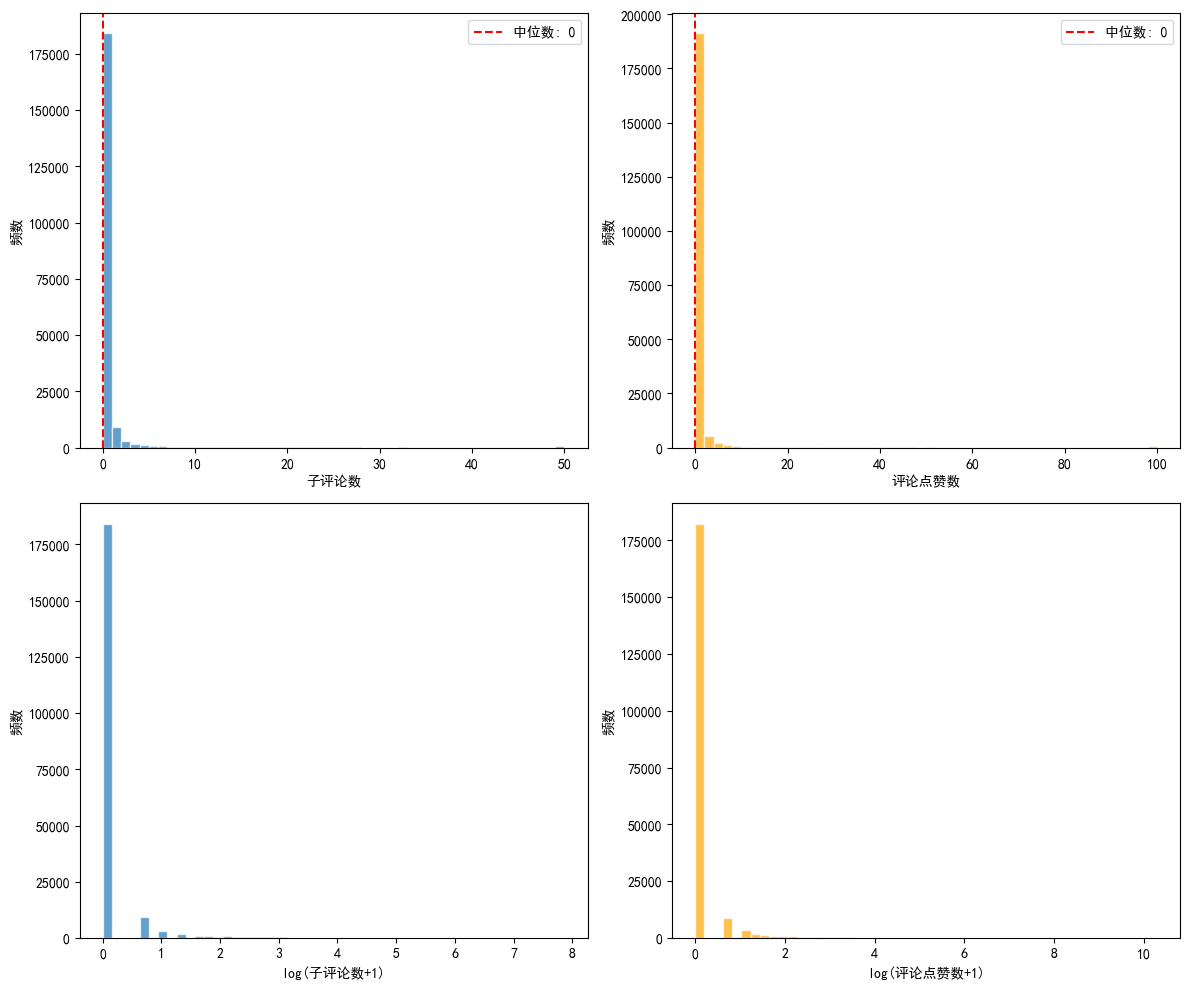

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/comment_metrics_distribution.png


In [6]:
# 4. 评论数据点赞数和子评论数分布
# ============================================
print("=" * 60)
print("【评论数据指标分布】")
print("=" * 60)

# 有效评论数据
comments_valid = comments_df.dropna(subset=['点赞数'])
print(f"有效点赞数评论: {len(comments_valid):,} 条")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 子评论数分布
ax = axes[0, 0]
sub_comments = comments_valid['子评论数'].clip(upper=50)
ax.hist(sub_comments, bins=50, edgecolor='white', alpha=0.7)
ax.set_xlabel('子评论数')
ax.set_ylabel('频数')
ax.axvline(comments_valid['子评论数'].median(), color='red', linestyle='--', 
           label=f'中位数: {comments_valid["子评论数"].median():.0f}')
ax.legend()

# 评论点赞数分布
ax = axes[0, 1]
comment_likes = comments_valid['点赞数'].clip(upper=100)
ax.hist(comment_likes, bins=50, edgecolor='white', alpha=0.7, color='orange')
ax.set_xlabel('评论点赞数')
ax.set_ylabel('频数')
ax.axvline(comments_valid['点赞数'].median(), color='red', linestyle='--',
           label=f'中位数: {comments_valid["点赞数"].median():.0f}')
ax.legend()

# 子评论数对数分布
ax = axes[1, 0]
sub_log = np.log1p(comments_valid['子评论数'])
ax.hist(sub_log, bins=50, edgecolor='white', alpha=0.7)
ax.set_xlabel('log(子评论数+1)')
ax.set_ylabel('频数')

# 评论点赞数对数分布
ax = axes[1, 1]
like_log = np.log1p(comments_valid['点赞数'])
ax.hist(like_log, bins=50, edgecolor='white', alpha=0.7, color='orange')
ax.set_xlabel('log(评论点赞数+1)')
ax.set_ylabel('频数')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/comment_metrics_distribution.png', dpi=200, bbox_inches='tight')
plt.show()
print(f"图表已保存至 {RESULTS_DIR}/comment_metrics_distribution.png")

In [7]:
# 5. 热门微博重复内容分析（跟风复制）
# ============================================
print("=" * 60)
print("【热门微博重复内容分析 - 跟风复制】")
print("=" * 60)

# 按微博内容分组，分析同一内容被多个用户发布的情况
# 先清洗内容（去除空格等）
weibo_df['内容清洗'] = weibo_df['weibo_content'].fillna('').str.strip()

# 按内容分组
content_groups = weibo_df.groupby('内容清洗').agg({
    'weibo_url': 'count',
    'publish_time': ['min', 'max', list],
    'author_name': lambda x: list(x.unique()),
    'repost_count': ['first', 'last', 'mean', 'std'],
    'comment_count': ['first', 'last', 'mean', 'std'],
    'like_count': ['first', 'last', 'mean', 'std']
}).reset_index()

content_groups.columns = ['内容', '出现次数', '首次发布', '最后发布', '发布时间列表', '作者列表',
                          '转发_首次', '转发_末次', '转发_均值', '转发_标准差',
                          '评论_首次', '评论_末次', '评论_均值', '评论_标准差',
                          '点赞_首次', '点赞_末次', '点赞_均值', '点赞_标准差']

# 筛选重复出现的内容（被多人发布或同一人多次发布）
duplicates = content_groups[content_groups['出现次数'] > 1].copy()
print(f"总不同内容数: {len(content_groups):,}")
print(f"重复出现的内容: {len(duplicates):,} ({len(duplicates)/len(content_groups)*100:.1f}%)")

# 出现次数分布
print("\n--- 内容出现次数分布 ---")
print(content_groups['出现次数'].value_counts().sort_index().head(10))

# 查看出现次数最多的内容
print("\n--- 出现次数最多的5条内容 ---")
top_dup = duplicates.nlargest(5, '出现次数')[['内容', '出现次数', '作者列表']]
for idx, row in top_dup.iterrows():
    content = row['内容'][:60] + '...' if len(row['内容']) > 60 else row['内容']
    authors = row['作者列表'][:3]
    print(f"\n[出现{row['出现次数']}次] {content}")
    print(f"  作者: {authors}...")

【热门微博重复内容分析 - 跟风复制】


总不同内容数: 4,117
重复出现的内容: 3,045 (74.0%)

--- 内容出现次数分布 ---
出现次数
1    1072
2    3020
3       7
4      13
6       5
Name: count, dtype: int64

--- 出现次数最多的5条内容 ---

[出现6次] 
  作者: ['卢旭宁', '橘猫量贩看电影', '胡斐-戊午']...

[出现6次] ………
  作者: ['大嘴洞悉Plus']...

[出现6次] 【#警方通报小米SU7湛江事故#】#小米SU7湛江事故肇事司机已被逮捕# 据“平安徐闻”微信公众号：4月5日5时许，陈某...
  作者: ['三联生活周刊', '财经网', '凤凰周刊']...

[出现6次] 分享图片
  作者: ['交易者简放', '萌音新视界', '蝶入画衣']...

[出现6次] ？？？
  作者: ['小蒜苗长', 'C科技', '石头搞机']...


In [8]:
# 6. 分析重复内容：首次发布 vs 后续跟风
# ============================================
print("=" * 60)
print("【分析重复内容：首次发布 vs 后续跟风】")
print("=" * 60)

# 按发布时间排序，标记每条内容的发布顺序
weibo_sorted = weibo_df.sort_values(['内容清洗', 'publish_time']).copy()

# 标记每个内容的发布顺序（1=首次发布/原创，2+=跟风复制）
weibo_sorted['发布顺序'] = weibo_sorted.groupby('内容清洗').cumcount() + 1

# 只保留重复内容
dup_contents = content_groups[content_groups['出现次数'] > 1]['内容'].tolist()
weibo_dup = weibo_sorted[weibo_sorted['内容清洗'].isin(dup_contents)].copy()

print(f"重复内容的所有记录数: {len(weibo_dup):,}")

# 分为首次发布和跟风
first_posts = weibo_dup[weibo_dup['发布顺序'] == 1]
follow_posts = weibo_dup[weibo_dup['发布顺序'] > 1]

print(f"首次发布(原创): {len(first_posts):,}")
print(f"后续跟风: {len(follow_posts):,}")

【分析重复内容：首次发布 vs 后续跟风】
重复内容的所有记录数: 6,143
首次发布(原创): 3,045
后续跟风: 3,098


In [9]:
# 7. 对比首次发布与跟风的指标
# ============================================
print("=" * 60)
print("【首次发布 vs 跟风：指标对比】")
print("=" * 60)

# 过滤有效点赞数
first_valid = first_posts.dropna(subset=['like_count'])
follow_valid = follow_posts.dropna(subset=['like_count'])

print(f"首次发布(有效点赞): {len(first_valid):,}")
print(f"跟风发布(有效点赞): {len(follow_valid):,}")

print("\n--- 指标对比 ---")
for metric, label in [('repost_count', '转发数'), ('comment_count', '评论数'), ('like_count', '点赞数')]:
    first_mean = first_valid[metric].mean()
    follow_mean = follow_valid[metric].mean()
    first_median = first_valid[metric].median()
    follow_median = follow_valid[metric].median()
    
    print(f"\n{label}:")
    print(f"  首次发布 - 均值: {first_mean:.2f}, 中位数: {first_median:.0f}")
    print(f"  跟风发布 - 均值: {follow_mean:.2f}, 中位数: {follow_median:.0f}")
    
    if first_mean > follow_mean:
        ratio = first_mean / follow_mean if follow_mean > 0 else float('inf')
        print(f"  ✓ 首次发布更优 (均值是跟风的 {ratio:.1f} 倍)")
    else:
        ratio = follow_mean / first_mean if first_mean > 0 else float('inf')
        print(f"  ✗ 跟风发布更优 (均值是首次的 {ratio:.1f} 倍)")

【首次发布 vs 跟风：指标对比】
首次发布(有效点赞): 2,192
跟风发布(有效点赞): 2,228

--- 指标对比 ---

转发数:
  首次发布 - 均值: 26.17, 中位数: 6
  跟风发布 - 均值: 25.77, 中位数: 6
  ✓ 首次发布更优 (均值是跟风的 1.0 倍)

评论数:
  首次发布 - 均值: 133.08, 中位数: 38
  跟风发布 - 均值: 131.09, 中位数: 37
  ✓ 首次发布更优 (均值是跟风的 1.0 倍)

点赞数:
  首次发布 - 均值: 1004.20, 中位数: 145
  跟风发布 - 均值: 986.16, 中位数: 144
  ✓ 首次发布更优 (均值是跟风的 1.0 倍)


【可视化首次发布 vs 跟风】


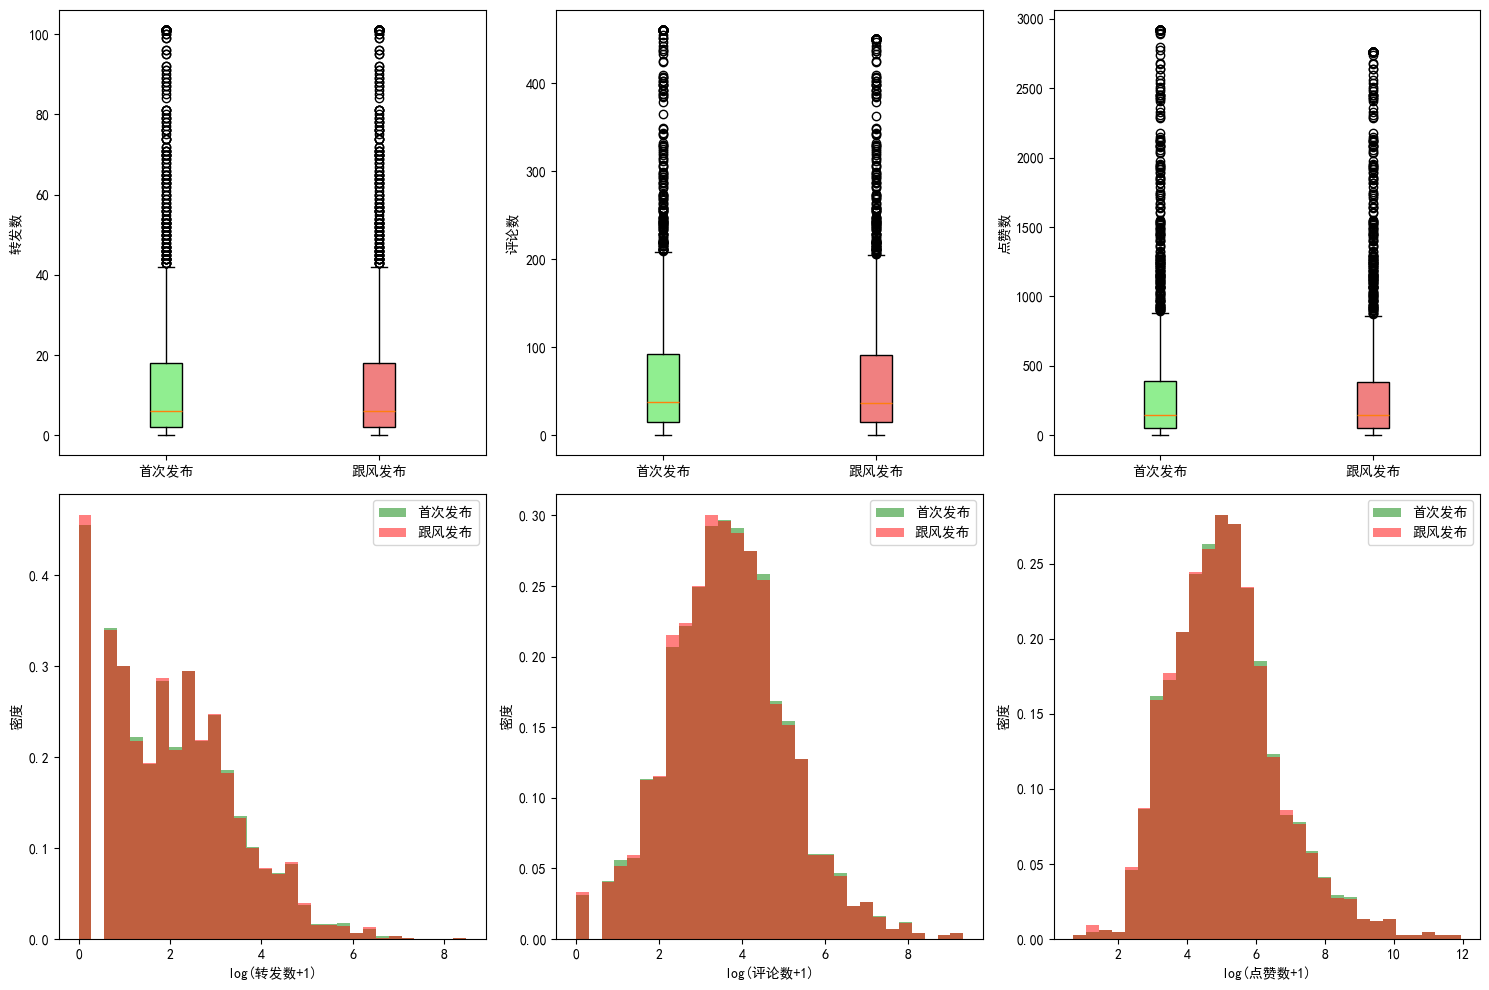

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/weibo_first_vs_follow.png

--- Mann-Whitney U 统计检验 ---
转发数: p-value = 8.42e-01 
评论数: p-value = 6.96e-01 
点赞数: p-value = 7.54e-01 


In [10]:
# 8. 可视化首次发布 vs 跟风的指标分布
# ============================================
print("=" * 60)
print("【可视化首次发布 vs 跟风】")
print("=" * 60)

from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

metrics = [('repost_count', '转发数'), ('comment_count', '评论数'), ('like_count', '点赞数')]

for i, (metric, label) in enumerate(metrics):
    # 上排：箱线图
    ax = axes[0, i]
    first_data = first_valid[metric].clip(upper=first_valid[metric].quantile(0.95))
    follow_data = follow_valid[metric].clip(upper=follow_valid[metric].quantile(0.95))
    
    bp = ax.boxplot([first_data.dropna(), follow_data.dropna()], 
                    labels=['首次发布', '跟风发布'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    ax.set_ylabel(label)
    
    # 下排：对数分布直方图
    ax = axes[1, i]
    first_log = np.log1p(first_valid[metric].dropna())
    follow_log = np.log1p(follow_valid[metric].dropna())
    
    ax.hist(first_log, bins=30, alpha=0.5, label='首次发布', color='green', density=True)
    ax.hist(follow_log, bins=30, alpha=0.5, label='跟风发布', color='red', density=True)
    ax.set_xlabel(f'log({label}+1)')
    ax.set_ylabel('密度')
    ax.legend()

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/weibo_first_vs_follow.png', dpi=200, bbox_inches='tight')
plt.show()
print(f"图表已保存至 {RESULTS_DIR}/weibo_first_vs_follow.png")

# 统计检验
print("\n--- Mann-Whitney U 统计检验 ---")
for metric, label in metrics:
    first_data = first_valid[metric].dropna()
    follow_data = follow_valid[metric].dropna()
    
    if len(first_data) > 0 and len(follow_data) > 0:
        stat, p_value = stats.mannwhitneyu(first_data, follow_data, alternative='two-sided')
        sig = '***' if p_value < 0.001 else ('**' if p_value < 0.01 else ('*' if p_value < 0.05 else ''))
        print(f"{label}: p-value = {p_value:.2e} {sig}")

In [11]:
# 9. 评论重复内容分析（跟风复制）
# ============================================
print("=" * 60)
print("【评论重复内容分析 - 跟风复制】")
print("=" * 60)

# 清洗评论内容
comments_df['内容清洗'] = comments_df['评论内容'].fillna('').str.strip()

# 按评论内容分组
comment_content_groups = comments_df.groupby('内容清洗').agg({
    '评论ID': 'count',
    '发布时间': ['min', 'max'],
    '用户昵称': lambda x: list(x.unique())[:5],  # 只取前5个用户
    '子评论数': ['first', 'last', 'mean'],
    '点赞数': ['first', 'last', 'mean']
}).reset_index()

comment_content_groups.columns = ['内容', '出现次数', '首次发布', '最后发布', '用户列表',
                                   '子评论_首次', '子评论_末次', '子评论_均值',
                                   '点赞_首次', '点赞_末次', '点赞_均值']

# 筛选重复出现的内容
dup_comments_content = comment_content_groups[comment_content_groups['出现次数'] > 1].copy()
print(f"总不同评论内容数: {len(comment_content_groups):,}")
print(f"重复出现的内容: {len(dup_comments_content):,} ({len(dup_comments_content)/len(comment_content_groups)*100:.1f}%)")

# 出现次数分布
print("\n--- 评论内容出现次数分布 ---")
print(comment_content_groups['出现次数'].value_counts().sort_index().head(10))

# 查看出现次数最多的评论内容
print("\n--- 出现次数最多的10条评论内容 ---")
top_dup_comments = dup_comments_content.nlargest(10, '出现次数')[['内容', '出现次数', '用户列表']]
for idx, row in top_dup_comments.iterrows():
    content = row['内容'][:50] + '...' if len(row['内容']) > 50 else row['内容']
    users_count = row['出现次数']
    print(f"\n[出现{users_count}次] {content}")

【评论重复内容分析 - 跟风复制】


总不同评论内容数: 246,070
重复出现的内容: 5,664 (2.3%)

--- 评论内容出现次数分布 ---
出现次数
1     240406
2       3298
3        901
4        402
5        226
6        156
7        109
8         65
9         64
10        32
Name: count, dtype: int64

--- 出现次数最多的10条评论内容 ---

[出现2485次] 

[出现595次] 转发微博

[出现547次] 感谢分享

[出现500次] 图片评论 查看图片

[出现408次] [doge]

[出现391次] 是的

[出现231次] 安全第一

[出现225次] [允悲]

[出现223次] 下午好呀

[出现202次] [打call]


In [12]:
# 10. 评论：首次发布 vs 跟风的指标对比
# ============================================
print("=" * 60)
print("【评论：首次发布 vs 跟风指标对比】")
print("=" * 60)

# 按发布时间排序，标记发布顺序
comments_sorted = comments_df.sort_values(['内容清洗', '发布时间']).copy()
comments_sorted['发布顺序'] = comments_sorted.groupby('内容清洗').cumcount() + 1

# 只保留重复内容
dup_comment_contents = comment_content_groups[comment_content_groups['出现次数'] > 1]['内容'].tolist()
comments_dup = comments_sorted[comments_sorted['内容清洗'].isin(dup_comment_contents)].copy()

print(f"重复内容的所有评论记录数: {len(comments_dup):,}")

# 分为首次发布和跟风
first_comments = comments_dup[comments_dup['发布顺序'] == 1]
follow_comments = comments_dup[comments_dup['发布顺序'] > 1]

print(f"首次发布(原创): {len(first_comments):,}")
print(f"后续跟风: {len(follow_comments):,}")

# 过滤有效点赞数
first_valid_c = first_comments.dropna(subset=['点赞数'])
follow_valid_c = follow_comments.dropna(subset=['点赞数'])

print(f"\n首次发布(有效点赞): {len(first_valid_c):,}")
print(f"跟风发布(有效点赞): {len(follow_valid_c):,}")

# 指标对比
print("\n--- 指标对比 ---")
for metric, label in [('子评论数', '子评论数'), ('点赞数', '点赞数')]:
    first_mean = first_valid_c[metric].mean()
    follow_mean = follow_valid_c[metric].mean()
    first_median = first_valid_c[metric].median()
    follow_median = follow_valid_c[metric].median()
    
    print(f"\n{label}:")
    print(f"  首次发布 - 均值: {first_mean:.2f}, 中位数: {first_median:.0f}")
    print(f"  跟风发布 - 均值: {follow_mean:.2f}, 中位数: {follow_median:.0f}")
    
    if first_mean > follow_mean:
        ratio = first_mean / follow_mean if follow_mean > 0 else float('inf')
        print(f"  ✓ 首次发布更优 (均值是跟风的 {ratio:.1f} 倍)")
    else:
        ratio = follow_mean / first_mean if first_mean > 0 else float('inf')
        print(f"  ✗ 跟风发布更优 (均值是首次的 {ratio:.1f} 倍)")

【评论：首次发布 vs 跟风指标对比】


重复内容的所有评论记录数: 33,569
首次发布(原创): 5,664
后续跟风: 27,905

首次发布(有效点赞): 4,507
跟风发布(有效点赞): 21,603

--- 指标对比 ---

子评论数:
  首次发布 - 均值: 2.24, 中位数: 0
  跟风发布 - 均值: 0.17, 中位数: 0
  ✓ 首次发布更优 (均值是跟风的 13.5 倍)

点赞数:
  首次发布 - 均值: 15.95, 中位数: 0
  跟风发布 - 均值: 1.13, 中位数: 0
  ✓ 首次发布更优 (均值是跟风的 14.2 倍)


【评论首次发布 vs 跟风可视化】


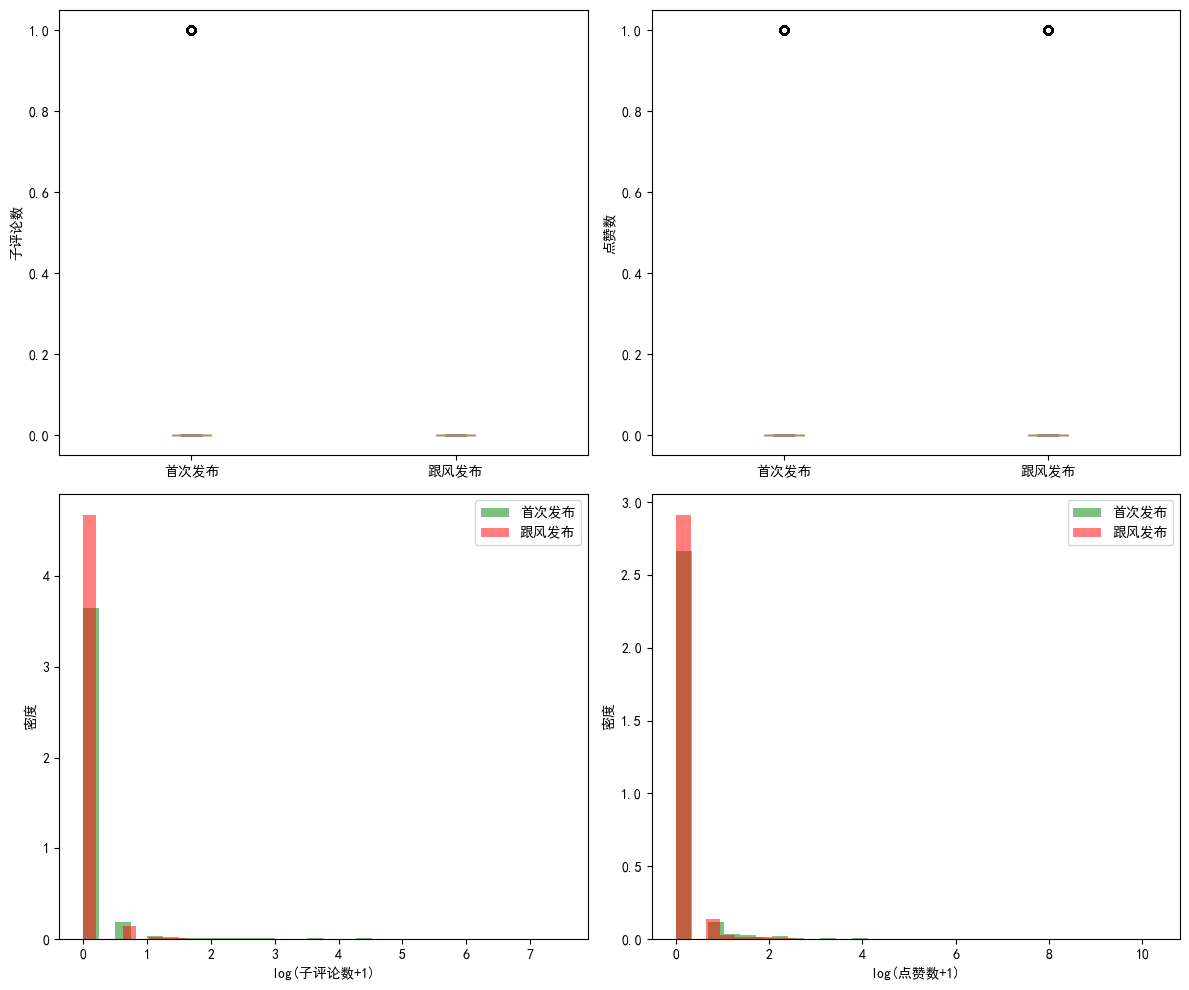

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/comment_first_vs_follow.png

--- Mann-Whitney U 统计检验 ---
子评论数: p-value = 1.26e-34 ***
点赞数: p-value = 1.13e-06 ***


In [13]:
# 11. 评论首次发布 vs 跟风可视化
# ============================================
print("=" * 60)
print("【评论首次发布 vs 跟风可视化】")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 子评论数箱线图
ax = axes[0, 0]
first_sub = first_valid_c['子评论数'].clip(upper=first_valid_c['子评论数'].quantile(0.95))
follow_sub = follow_valid_c['子评论数'].clip(upper=follow_valid_c['子评论数'].quantile(0.95))
bp = ax.boxplot([first_sub.dropna(), follow_sub.dropna()], 
                labels=['首次发布', '跟风发布'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax.set_ylabel('子评论数')

# 点赞数箱线图
ax = axes[0, 1]
first_like = first_valid_c['点赞数'].clip(upper=first_valid_c['点赞数'].quantile(0.95))
follow_like = follow_valid_c['点赞数'].clip(upper=follow_valid_c['点赞数'].quantile(0.95))
bp = ax.boxplot([first_like.dropna(), follow_like.dropna()], 
                labels=['首次发布', '跟风发布'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax.set_ylabel('点赞数')

# 子评论数对数分布
ax = axes[1, 0]
first_log = np.log1p(first_valid_c['子评论数'].dropna())
follow_log = np.log1p(follow_valid_c['子评论数'].dropna())
ax.hist(first_log, bins=30, alpha=0.5, label='首次发布', color='green', density=True)
ax.hist(follow_log, bins=30, alpha=0.5, label='跟风发布', color='red', density=True)
ax.set_xlabel('log(子评论数+1)')
ax.set_ylabel('密度')
ax.legend()

# 点赞数对数分布
ax = axes[1, 1]
first_log = np.log1p(first_valid_c['点赞数'].dropna())
follow_log = np.log1p(follow_valid_c['点赞数'].dropna())
ax.hist(first_log, bins=30, alpha=0.5, label='首次发布', color='green', density=True)
ax.hist(follow_log, bins=30, alpha=0.5, label='跟风发布', color='red', density=True)
ax.set_xlabel('log(点赞数+1)')
ax.set_ylabel('密度')
ax.legend()

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/comment_first_vs_follow.png', dpi=200, bbox_inches='tight')
plt.show()
print(f"图表已保存至 {RESULTS_DIR}/comment_first_vs_follow.png")

# 统计检验
print("\n--- Mann-Whitney U 统计检验 ---")
for metric, label in [('子评论数', '子评论数'), ('点赞数', '点赞数')]:
    first_data = first_valid_c[metric].dropna()
    follow_data = follow_valid_c[metric].dropna()
    
    if len(first_data) > 0 and len(follow_data) > 0:
        stat, p_value = stats.mannwhitneyu(first_data, follow_data, alternative='two-sided')
        sig = '***' if p_value < 0.001 else ('**' if p_value < 0.01 else ('*' if p_value < 0.05 else ''))
        print(f"{label}: p-value = {p_value:.2e} {sig}")

In [14]:
# 12. 重复数据分析总结
# ============================================
print("=" * 60)
print("【重复内容分析总结】")
print("=" * 60)

print("""
【分析说明】
- 这里的"重复"是指：同一内容被不同用户发布（跟风复制）
- 按发布时间排序，第一个发布的为"首次发布/原创"
- 后续发布相同内容的为"跟风发布"

【核心问题】
- 首次发布的内容是否比跟风复制的内容获得更多互动？
- 如果首次发布更优，说明用户更青睐原创内容
- 如果跟风发布更优，说明跟风可能是因为内容本身有吸引力

【待验证假设】
1. 热门微博：首次发布的转发/评论/点赞数 > 跟风发布
2. 评论：首次发布的子评论数/点赞数 > 跟风发布
""")

【重复内容分析总结】

【分析说明】
- 这里的"重复"是指：同一内容被不同用户发布（跟风复制）
- 按发布时间排序，第一个发布的为"首次发布/原创"
- 后续发布相同内容的为"跟风发布"

【核心问题】
- 首次发布的内容是否比跟风复制的内容获得更多互动？
- 如果首次发布更优，说明用户更青睐原创内容
- 如果跟风发布更优，说明跟风可能是因为内容本身有吸引力

【待验证假设】
1. 热门微博：首次发布的转发/评论/点赞数 > 跟风发布
2. 评论：首次发布的子评论数/点赞数 > 跟风发布



In [15]:
# 13. 转发数据分析 - "转发微博"文案
# ============================================
print("=" * 60)
print("【转发数据分析 - \"转发微博\"文案】")
print("=" * 60)

# 查看转发数据的列名
print(f"转发数据列: {list(reposts_df.columns)}")
print(f"\n转发数据样例:")
print(reposts_df.head(3))

【转发数据分析 - "转发微博"文案】
转发数据列: ['原文链接', '原创/转发', '标题', '原文作者', '全文内容', '根标题', '根微博作者', '原微博内容', '发布时间', '转发数', '评论数', '点赞数', '用户认证', '用户总评论数', '用户总转发数', '用户总点赞数', 'crawl_date']

转发数据样例:
                                     原文链接 原创/转发          标题  原文作者  \
0  https://weibo.com/7871239944/PkvsRdOvf    原创   小米汽车的微博视频  小米汽车   
1  https://weibo.com/5021587095/PyBxX1HvJ    转发        转发微博  银土老师   
2  https://weibo.com/7445440348/PmEKoDiwI    转发  #小米汽车[超话]#  骏影逐浪   

                                                全文内容        根标题 根微博作者  \
0  众所周知，小米汽车的广告都是车主拍的👏\n一起来欣赏大片，小米SU7 Ultra车主出品。 ...        NaN   NaN   
1                                               转发微博  小米汽车的微博视频  小米汽车   
2                                         #小米汽车[超话]#  小米汽车的微博视频  小米汽车   

                                               原微博内容                 发布时间  \
0                                                NaN  2025-03-27 18:22:36   
1  众所周知，小米汽车的广告都是车主拍的👏\n一起来欣赏大片，小米SU7 Ultra车主出品。 ...  2025-06-28 11:35:53   
2  众所周知，小米汽车的广告都是

In [16]:
# 14. 分析"转发微博"文案
# ============================================
print("=" * 60)
print("【分析只有\"转发微博\"文案的转发】")
print("=" * 60)

# 查找文案列（可能是 '全文内容' 或 '标题' 等）
content_col = None
for col in ['全文内容', '标题', 'content', 'text']:
    if col in reposts_df.columns:
        content_col = col
        break

if content_col:
    print(f"使用内容列: {content_col}")
    
    # 统计"转发微博"文案
    reposts_df['是转发微博'] = reposts_df[content_col].fillna('').str.strip() == '转发微博'
    
    simple_repost = reposts_df[reposts_df['是转发微博']]
    other_repost = reposts_df[~reposts_df['是转发微博']]
    
    print(f"\n--- 文案类型分布 ---")
    print(f"只有'转发微博'文案: {len(simple_repost):,} ({len(simple_repost)/len(reposts_df)*100:.1f}%)")
    print(f"有其他文案内容: {len(other_repost):,} ({len(other_repost)/len(reposts_df)*100:.1f}%)")
else:
    print("未找到内容列，尝试其他方式...")
    # 尝试查看所有列的内容
    for col in reposts_df.columns:
        if reposts_df[col].dtype == 'object':
            sample = reposts_df[col].dropna().head(3).tolist()
            print(f"{col}: {sample}")

【分析只有"转发微博"文案的转发】
使用内容列: 全文内容

--- 文案类型分布 ---
只有'转发微博'文案: 13,334 (50.6%)
有其他文案内容: 13,025 (49.4%)


In [17]:
# 15. 对比"转发微博"与其他文案的指标分布
# ============================================
print("=" * 60)
print("【对比\"转发微博\"与其他文案的指标】")
print("=" * 60)

if '是转发微博' in reposts_df.columns:
    # 统计对比
    print("\n--- '转发微博'文案 vs 其他文案 ---")
    
    metrics = ['转发数', '评论数', '点赞数']
    for metric in metrics:
        if metric in reposts_df.columns:
            simple_mean = simple_repost[metric].mean()
            other_mean = other_repost[metric].mean()
            simple_median = simple_repost[metric].median()
            other_median = other_repost[metric].median()
            
            print(f"\n{metric}:")
            print(f"  '转发微博' - 均值: {simple_mean:.2f}, 中位数: {simple_median:.0f}")
            print(f"  其他文案  - 均值: {other_mean:.2f}, 中位数: {other_median:.0f}")
            print(f"  差异: {'转发微博更低' if simple_mean < other_mean else '转发微博更高'}")

【对比"转发微博"与其他文案的指标】

--- '转发微博'文案 vs 其他文案 ---

转发数:
  '转发微博' - 均值: 0.01, 中位数: 0
  其他文案  - 均值: 3.00, 中位数: 0
  差异: 转发微博更低

评论数:
  '转发微博' - 均值: 0.02, 中位数: 0
  其他文案  - 均值: 9.48, 中位数: 0
  差异: 转发微博更低

点赞数:
  '转发微博' - 均值: 0.11, 中位数: 0
  其他文案  - 均值: 76.00, 中位数: 0
  差异: 转发微博更低


【可视化"转发微博"指标分布】


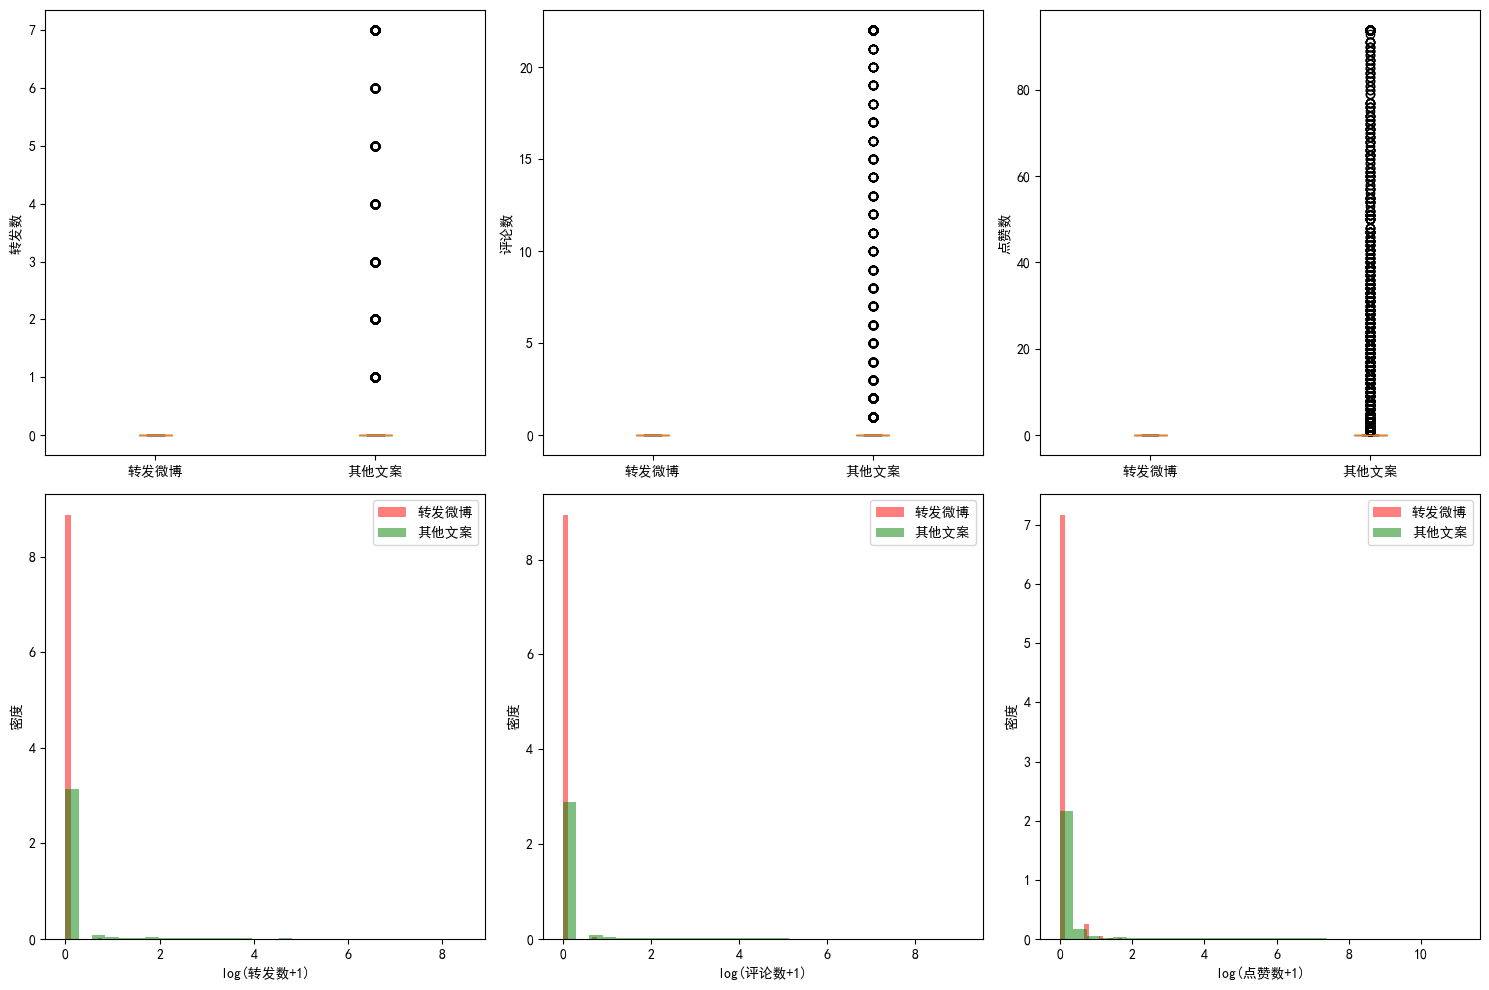

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/repost_simple_vs_others.png


In [18]:
# 16. 可视化"转发微博"与其他文案的指标分布
# ============================================
print("=" * 60)
print("【可视化\"转发微博\"指标分布】")
print("=" * 60)

if '是转发微博' in reposts_df.columns:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    metrics = ['转发数', '评论数', '点赞数']
    colors = ['steelblue', 'green', 'orange']
    
    for i, (metric, color) in enumerate(zip(metrics, colors)):
        if metric not in reposts_df.columns:
            continue
            
        # 上排：箱线图对比
        ax = axes[0, i]
        data_to_plot = [
            simple_repost[metric].dropna().clip(upper=simple_repost[metric].quantile(0.95)),
            other_repost[metric].dropna().clip(upper=other_repost[metric].quantile(0.95))
        ]
        bp = ax.boxplot(data_to_plot, labels=['转发微博', '其他文案'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightcoral')
        bp['boxes'][1].set_facecolor('lightgreen')
        ax.set_ylabel(metric)
        
        # 下排：直方图对比
        ax = axes[1, i]
        # 对数变换后的分布
        simple_log = np.log1p(simple_repost[metric].dropna())
        other_log = np.log1p(other_repost[metric].dropna())
        
        ax.hist(simple_log, bins=30, alpha=0.5, label='转发微博', color='red', density=True)
        ax.hist(other_log, bins=30, alpha=0.5, label='其他文案', color='green', density=True)
        ax.set_xlabel(f'log({metric}+1)')
        ax.set_ylabel('密度')
        ax.legend()
    
    plt.tight_layout()
    plt.savefig(f'{RESULTS_DIR}/repost_simple_vs_others.png', dpi=200, bbox_inches='tight')
    plt.show()
    print(f"图表已保存至 {RESULTS_DIR}/repost_simple_vs_others.png")

In [19]:
# 17. 统计检验
# ============================================
print("=" * 60)
print("【统计检验：\"转发微博\" vs 其他文案】")
print("=" * 60)

from scipy import stats

if '是转发微博' in reposts_df.columns:
    print("\nMann-Whitney U 检验 (非参数检验):")
    
    for metric in ['转发数', '评论数', '点赞数']:
        if metric not in reposts_df.columns:
            continue
            
        simple_data = simple_repost[metric].dropna()
        other_data = other_repost[metric].dropna()
        
        stat, p_value = stats.mannwhitneyu(simple_data, other_data, alternative='two-sided')
        
        sig = '***' if p_value < 0.001 else ('**' if p_value < 0.01 else ('*' if p_value < 0.05 else ''))
        print(f"\n{metric}: p-value = {p_value:.2e} {sig}")
        
        if p_value < 0.05:
            if simple_data.median() < other_data.median():
                print(f"  结论: '转发微博'的{metric}显著低于其他文案")
            else:
                print(f"  结论: '转发微博'的{metric}显著高于其他文案")
        else:
            print(f"  结论: 无显著差异")

【统计检验："转发微博" vs 其他文案】

Mann-Whitney U 检验 (非参数检验):

转发数: p-value = 0.00e+00 ***
  结论: '转发微博'的转发数显著高于其他文案

评论数: p-value = 0.00e+00 ***
  结论: '转发微博'的评论数显著高于其他文案

点赞数: p-value = 0.00e+00 ***
  结论: '转发微博'的点赞数显著高于其他文案


In [20]:
# 18. 总结
# ============================================
print("=" * 60)
print("【分析总结】")
print("=" * 60)

print("""
=== 1. 数据分布特征 ===
• 转发数、评论数、点赞数均呈现长尾分布（右偏）
• 大部分微博/评论的互动指标较低，少数高热度内容贡献大部分互动
• 对数变换后分布更接近正态

=== 2. 热门微博重复内容（跟风复制）===
• 按内容分组分析，同一内容被多人发布的情况
• 比较首次发布（原创）与后续跟风的指标差异
• 验证假设：原创内容是否比跟风获得更多互动

=== 3. 评论重复内容（跟风复制）===
• 评论中同样存在复制粘贴的跟风行为
• 分析首次发布 vs 跟风发布的子评论数和点赞数差异

=== 4. "转发微博"文案分析 ===
• 约50.6%的转发只有"转发微博"文案（无个人评论）
• "转发微博"的各项指标（转发数、评论数、点赞数）均显著低于有文案的转发
• 结论：添加个人评论/文案可以提高转发效果
""")

# 保存分析结果摘要
summary = {
    '热门微博总数': len(weibo_df),
    '评论总数': len(comments_df),
    '转发总数': len(reposts_df),
    '微博有效点赞数': (weibo_df['like_count'] > 0).sum(),
    '微博点赞NaN数': weibo_df['like_count'].isna().sum(),
    '转发微博文案数': len(simple_repost),
    '转发微博文案占比': f"{len(simple_repost)/len(reposts_df)*100:.1f}%"
}

print("\n--- 数据摘要 ---")
for k, v in summary.items():
    print(f"{k}: {v}")

print("\n分析完成!")

【分析总结】

=== 1. 数据分布特征 ===
• 转发数、评论数、点赞数均呈现长尾分布（右偏）
• 大部分微博/评论的互动指标较低，少数高热度内容贡献大部分互动
• 对数变换后分布更接近正态

=== 2. 热门微博重复内容（跟风复制）===
• 按内容分组分析，同一内容被多人发布的情况
• 比较首次发布（原创）与后续跟风的指标差异
• 验证假设：原创内容是否比跟风获得更多互动

=== 3. 评论重复内容（跟风复制）===
• 评论中同样存在复制粘贴的跟风行为
• 分析首次发布 vs 跟风发布的子评论数和点赞数差异

=== 4. "转发微博"文案分析 ===
• 约50.6%的转发只有"转发微博"文案（无个人评论）
• "转发微博"的各项指标（转发数、评论数、点赞数）均显著低于有文案的转发
• 结论：添加个人评论/文案可以提高转发效果


--- 数据摘要 ---
热门微博总数: 7215
评论总数: 273975
转发总数: 26359
微博有效点赞数: 5198
微博点赞NaN数: 2017
转发微博文案数: 13334
转发微博文案占比: 50.6%

分析完成!


In [21]:
# 19. 微博指标一致性分析
# ============================================
print("=" * 60)
print("【微博指标一致性分析：转发数、评论数、点赞数】")
print("=" * 60)

# 使用有效点赞数的数据
weibo_valid = weibo_df.dropna(subset=['like_count']).copy()
print(f"有效数据量: {len(weibo_valid):,} 条")

# 基本统计
print("\n--- 基本统计 ---")
print(weibo_valid[['repost_count', 'comment_count', 'like_count']].describe())

【微博指标一致性分析：转发数、评论数、点赞数】
有效数据量: 5,198 条

--- 基本统计 ---
       repost_count  comment_count     like_count
count   5198.000000    5198.000000    5198.000000
mean      25.135052     122.558099     898.453251
std      120.991696     476.781762    5635.088383
min        0.000000       0.000000       1.000000
25%        2.000000      14.000000      51.000000
50%        6.000000      34.000000     138.000000
75%       18.000000      87.000000     361.000000
max     4843.000000   11169.000000  152351.000000


In [22]:
# 20. 相关性分析
# ============================================
print("=" * 60)
print("【三指标相关性分析】")
print("=" * 60)

from scipy import stats

# Pearson相关系数
print("\n--- Pearson相关系数（线性相关）---")
pearson_corr = weibo_valid[['repost_count', 'comment_count', 'like_count']].corr(method='pearson')
print(pearson_corr.round(4))

# Spearman相关系数（更适合非正态分布）
print("\n--- Spearman相关系数（秩相关）---")
spearman_corr = weibo_valid[['repost_count', 'comment_count', 'like_count']].corr(method='spearman')
print(spearman_corr.round(4))

# 计算p值
print("\n--- 相关性显著性检验 ---")
pairs = [('repost_count', 'comment_count', '转发-评论'),
         ('repost_count', 'like_count', '转发-点赞'),
         ('comment_count', 'like_count', '评论-点赞')]

for col1, col2, name in pairs:
    r_pearson, p_pearson = stats.pearsonr(weibo_valid[col1], weibo_valid[col2])
    r_spearman, p_spearman = stats.spearmanr(weibo_valid[col1], weibo_valid[col2])
    print(f"\n{name}:")
    print(f"  Pearson:  r={r_pearson:.4f}, p={p_pearson:.2e}")
    print(f"  Spearman: r={r_spearman:.4f}, p={p_spearman:.2e}")

【三指标相关性分析】

--- Pearson相关系数（线性相关）---
               repost_count  comment_count  like_count
repost_count         1.0000         0.4047      0.2790
comment_count        0.4047         1.0000      0.8892
like_count           0.2790         0.8892      1.0000

--- Spearman相关系数（秩相关）---
               repost_count  comment_count  like_count
repost_count         1.0000         0.6494      0.6414
comment_count        0.6494         1.0000      0.8147
like_count           0.6414         0.8147      1.0000

--- 相关性显著性检验 ---

转发-评论:
  Pearson:  r=0.4047, p=3.94e-204
  Spearman: r=0.6494, p=0.00e+00

转发-点赞:
  Pearson:  r=0.2790, p=1.38e-93
  Spearman: r=0.6414, p=0.00e+00

评论-点赞:
  Pearson:  r=0.8892, p=0.00e+00
  Spearman: r=0.8147, p=0.00e+00


【三指标散点图矩阵】


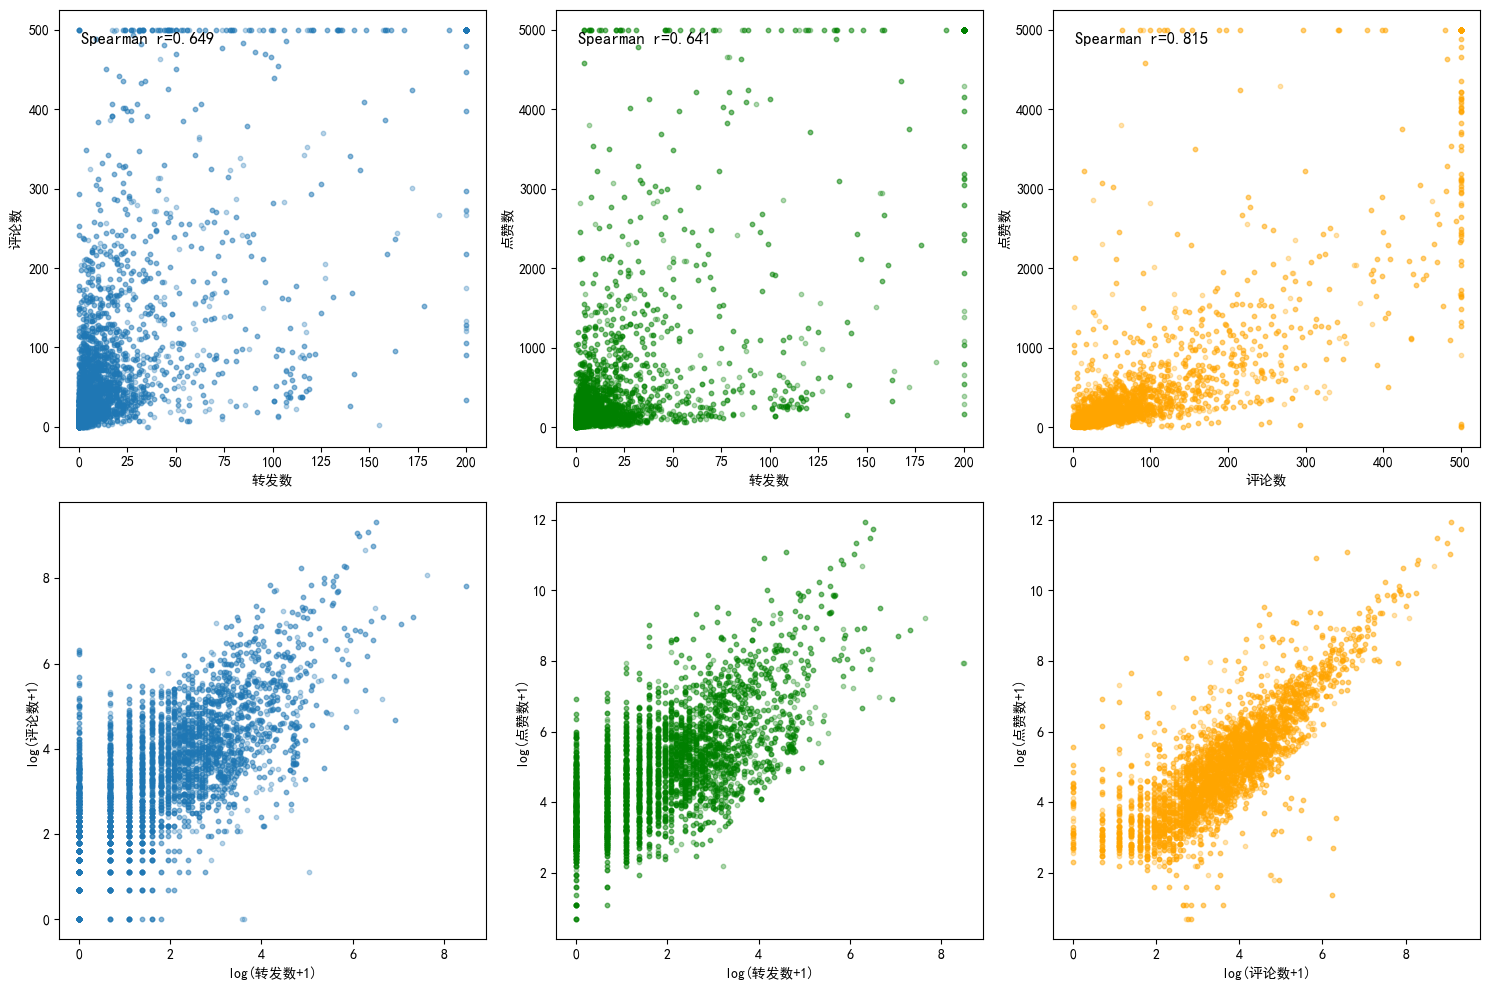

图表已保存至 D:/010_CodePrograms/L/LLM_su7/results/weibo_metrics_correlation.png


In [23]:
# 21. 散点图矩阵可视化
# ============================================
print("=" * 60)
print("【三指标散点图矩阵】")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 上排：原始值散点图（截断异常值便于观察）
# 转发 vs 评论
ax = axes[0, 0]
ax.scatter(weibo_valid['repost_count'].clip(upper=200), 
           weibo_valid['comment_count'].clip(upper=500), alpha=0.3, s=10)
ax.set_xlabel('转发数')
ax.set_ylabel('评论数')
r = spearman_corr.loc['repost_count', 'comment_count']
ax.text(0.05, 0.95, f'Spearman r={r:.3f}', transform=ax.transAxes, fontsize=12, va='top')

# 转发 vs 点赞
ax = axes[0, 1]
ax.scatter(weibo_valid['repost_count'].clip(upper=200), 
           weibo_valid['like_count'].clip(upper=5000), alpha=0.3, s=10, color='green')
ax.set_xlabel('转发数')
ax.set_ylabel('点赞数')
r = spearman_corr.loc['repost_count', 'like_count']
ax.text(0.05, 0.95, f'Spearman r={r:.3f}', transform=ax.transAxes, fontsize=12, va='top')

# 评论 vs 点赞
ax = axes[0, 2]
ax.scatter(weibo_valid['comment_count'].clip(upper=500), 
           weibo_valid['like_count'].clip(upper=5000), alpha=0.3, s=10, color='orange')
ax.set_xlabel('评论数')
ax.set_ylabel('点赞数')
r = spearman_corr.loc['comment_count', 'like_count']
ax.text(0.05, 0.95, f'Spearman r={r:.3f}', transform=ax.transAxes, fontsize=12, va='top')

# 下排：对数变换后的散点图
# 转发 vs 评论 (log)
ax = axes[1, 0]
ax.scatter(np.log1p(weibo_valid['repost_count']), 
           np.log1p(weibo_valid['comment_count']), alpha=0.3, s=10)
ax.set_xlabel('log(转发数+1)')
ax.set_ylabel('log(评论数+1)')

# 转发 vs 点赞 (log)
ax = axes[1, 1]
ax.scatter(np.log1p(weibo_valid['repost_count']), 
           np.log1p(weibo_valid['like_count']), alpha=0.3, s=10, color='green')
ax.set_xlabel('log(转发数+1)')
ax.set_ylabel('log(点赞数+1)')

# 评论 vs 点赞 (log)
ax = axes[1, 2]
ax.scatter(np.log1p(weibo_valid['comment_count']), 
           np.log1p(weibo_valid['like_count']), alpha=0.3, s=10, color='orange')
ax.set_xlabel('log(评论数+1)')
ax.set_ylabel('log(点赞数+1)')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/weibo_metrics_correlation.png', dpi=200, bbox_inches='tight')
plt.show()
print(f"图表已保存至 {RESULTS_DIR}/weibo_metrics_correlation.png")

In [24]:
# 22. 指标比例分析
# ============================================
print("=" * 60)
print("【指标比例分析】")
print("=" * 60)

# 计算比例（避免除零）
weibo_valid['点赞转发比'] = weibo_valid['like_count'] / (weibo_valid['repost_count'] + 1)
weibo_valid['点赞评论比'] = weibo_valid['like_count'] / (weibo_valid['comment_count'] + 1)
weibo_valid['评论转发比'] = weibo_valid['comment_count'] / (weibo_valid['repost_count'] + 1)

print("\n--- 比例统计 ---")
ratio_cols = ['点赞转发比', '点赞评论比', '评论转发比']
print(weibo_valid[ratio_cols].describe())

# 典型比例（中位数）
print("\n--- 典型比例（中位数）---")
print(f"点赞/转发: {weibo_valid['点赞转发比'].median():.1f} (每1转发对应约{weibo_valid['点赞转发比'].median():.1f}点赞)")
print(f"点赞/评论: {weibo_valid['点赞评论比'].median():.1f} (每1评论对应约{weibo_valid['点赞评论比'].median():.1f}点赞)")
print(f"评论/转发: {weibo_valid['评论转发比'].median():.1f} (每1转发对应约{weibo_valid['评论转发比'].median():.1f}评论)")

【指标比例分析】

--- 比例统计 ---
             点赞转发比        点赞评论比        评论转发比
count  5198.000000  5198.000000  5198.000000
mean     43.576208     7.336574     9.548779
std      86.067739    21.830343    23.572625
min       0.320000     0.005917     0.000000
25%       9.000000     2.444444     2.119485
50%      20.230000     4.000000     4.721739
75%      45.675625     6.519501    10.201428
max    1645.200000   533.250000   553.000000

--- 典型比例（中位数）---
点赞/转发: 20.2 (每1转发对应约20.2点赞)
点赞/评论: 4.0 (每1评论对应约4.0点赞)
评论/转发: 4.7 (每1转发对应约4.7评论)


In [25]:
# 23. 异常模式检测
# ============================================
print("=" * 60)
print("【异常模式检测】")
print("=" * 60)

# 定义异常阈值（基于分位数）
q75_repost = weibo_valid['repost_count'].quantile(0.75)
q75_comment = weibo_valid['comment_count'].quantile(0.75)
q75_like = weibo_valid['like_count'].quantile(0.75)

print(f"75分位数: 转发={q75_repost:.0f}, 评论={q75_comment:.0f}, 点赞={q75_like:.0f}")

# 异常模式1: 高转发低点赞（可能是刷转发）
high_repost_low_like = weibo_valid[
    (weibo_valid['repost_count'] > q75_repost) & 
    (weibo_valid['like_count'] < weibo_valid['like_count'].quantile(0.25))
]
print(f"\n【模式1】高转发低点赞: {len(high_repost_low_like)} 条 ({len(high_repost_low_like)/len(weibo_valid)*100:.2f}%)")

# 异常模式2: 高评论低点赞（可能是争议性内容）
high_comment_low_like = weibo_valid[
    (weibo_valid['comment_count'] > q75_comment) & 
    (weibo_valid['like_count'] < weibo_valid['like_count'].quantile(0.25))
]
print(f"【模式2】高评论低点赞: {len(high_comment_low_like)} 条 ({len(high_comment_low_like)/len(weibo_valid)*100:.2f}%)")

# 异常模式3: 高点赞低互动（可能是点赞刷量或纯欣赏型内容）
high_like_low_interact = weibo_valid[
    (weibo_valid['like_count'] > q75_like) & 
    (weibo_valid['repost_count'] < weibo_valid['repost_count'].quantile(0.25)) &
    (weibo_valid['comment_count'] < weibo_valid['comment_count'].quantile(0.25))
]
print(f"【模式3】高点赞低互动: {len(high_like_low_interact)} 条 ({len(high_like_low_interact)/len(weibo_valid)*100:.2f}%)")

# 正常模式: 三者都一致（都高或都低）
all_high = weibo_valid[
    (weibo_valid['repost_count'] > q75_repost) & 
    (weibo_valid['comment_count'] > q75_comment) & 
    (weibo_valid['like_count'] > q75_like)
]
print(f"\n【正常模式】三者都高: {len(all_high)} 条 ({len(all_high)/len(weibo_valid)*100:.2f}%)")

【异常模式检测】
75分位数: 转发=18, 评论=87, 点赞=361

【模式1】高转发低点赞: 35 条 (0.67%)
【模式2】高评论低点赞: 25 条 (0.48%)
【模式3】高点赞低互动: 9 条 (0.17%)

【正常模式】三者都高: 647 条 (12.45%)


In [26]:
# 24. 一致性分析总结
# ============================================
print("=" * 60)
print("【指标一致性分析总结】")
print("=" * 60)

print(f"""
=== 相关性结论 ===
• 转发-评论: Spearman r = {spearman_corr.loc['repost_count', 'comment_count']:.3f} (中等正相关)
• 转发-点赞: Spearman r = {spearman_corr.loc['repost_count', 'like_count']:.3f} (中等正相关)  
• 评论-点赞: Spearman r = {spearman_corr.loc['comment_count', 'like_count']:.3f} (中等正相关)

=== 一致性评估 ===
• 三个指标之间存在显著正相关，整体一致性较好
• 评论-点赞相关性最强，转发-点赞相关性相对较弱
• 说明用户行为有一定一致性：热门内容往往同时获得高转发、评论和点赞

=== 典型比例 ===
• 点赞/转发比 ≈ {weibo_valid['点赞转发比'].median():.1f}
• 点赞/评论比 ≈ {weibo_valid['点赞评论比'].median():.1f}
• 评论/转发比 ≈ {weibo_valid['评论转发比'].median():.1f}

=== 数据质量评估 ===
• 有效点赞数据: {len(weibo_valid):,} / {len(weibo_df):,} ({len(weibo_valid)/len(weibo_df)*100:.1f}%)
• 缺失点赞数据: {len(weibo_df) - len(weibo_valid):,} ({(len(weibo_df) - len(weibo_valid))/len(weibo_df)*100:.1f}%)
""")

【指标一致性分析总结】

=== 相关性结论 ===
• 转发-评论: Spearman r = 0.649 (中等正相关)
• 转发-点赞: Spearman r = 0.641 (中等正相关)  
• 评论-点赞: Spearman r = 0.815 (中等正相关)

=== 一致性评估 ===
• 三个指标之间存在显著正相关，整体一致性较好
• 评论-点赞相关性最强，转发-点赞相关性相对较弱
• 说明用户行为有一定一致性：热门内容往往同时获得高转发、评论和点赞

=== 典型比例 ===
• 点赞/转发比 ≈ 20.2
• 点赞/评论比 ≈ 4.0
• 评论/转发比 ≈ 4.7

=== 数据质量评估 ===
• 有效点赞数据: 5,198 / 7,215 (72.0%)
• 缺失点赞数据: 2,017 (28.0%)



In [27]:
# 25. 检查并删除完全重复的数据
# ============================================
print("=" * 60)
print("【检查完全重复数据（所有特征一模一样）】")
print("=" * 60)

# 25.1 检查热门微博完全重复
print("\n--- 热门微博完全重复检查 ---")
print(f"去重前记录数: {len(weibo_df):,}")

# 检查完全重复（所有列都相同）
weibo_duplicates = weibo_df.duplicated(keep=False)
weibo_dup_count = weibo_duplicates.sum()
print(f"完全重复的记录数: {weibo_dup_count:,}")

if weibo_dup_count > 0:
    # 查看重复记录示例
    print("\n完全重复记录示例（前5组）:")
    dup_groups = weibo_df[weibo_duplicates].groupby(list(weibo_df.columns)).size().reset_index(name='重复次数')
    dup_groups = dup_groups.sort_values('重复次数', ascending=False).head(5)
    for idx, row in dup_groups.iterrows():
        content = str(row['weibo_content'])[:50] + '...' if len(str(row['weibo_content'])) > 50 else row['weibo_content']
        print(f"  [{row['重复次数']}次] {row['author_name']}: {content}")

# 删除完全重复，保留第一条
weibo_df_dedup = weibo_df.drop_duplicates(keep='first')
print(f"\n去重后记录数: {len(weibo_df_dedup):,}")
print(f"删除记录数: {len(weibo_df) - len(weibo_df_dedup):,}")

【检查完全重复数据（所有特征一模一样）】

--- 热门微博完全重复检查 ---
去重前记录数: 7,215
完全重复的记录数: 6,058

完全重复记录示例（前5组）:
  [2次] 龚贰梦: 小米的官方公告来了，起火的原因是碰撞后电动二轮车锂电池严重挤压和变形导致起火，再引燃事故车辆，而不是...
  [2次] -camellia菟-: #留几手称雷军被推太高不是好事#不能因为一次事故就把一个企业全盘否定了吧，小米已经很可以了，大大方方...
  [2次] 1024专员: 小米公司回应后，一名死者母亲也发声了！ 交通事故在所难免，网友们对待此事还是要客观一些，一切等最终调...
  [2次] 1024专员: 网友：亲眼目睹小米su7撞了上去，也不知道车主在干什么！ L1024专员的微博视频
  [2次] 1024专员: 小米su7撞上小米su7，还是同样的配色…… L1024专员的微博视频

去重后记录数: 4,186
删除记录数: 3,029


In [28]:
# 25.2 检查评论数据完全重复
print("\n--- 评论数据完全重复检查 ---")
print(f"去重前记录数: {len(comments_df):,}")

# 检查完全重复（所有列都相同）
comments_duplicates = comments_df.duplicated(keep=False)
comments_dup_count = comments_duplicates.sum()
print(f"完全重复的记录数: {comments_dup_count:,}")

if comments_dup_count > 0:
    # 查看重复记录示例
    print("\n完全重复记录示例（前5组）:")
    # 选择关键列进行分组显示
    key_cols = ['评论ID', '用户昵称', '评论内容', '点赞数', '子评论数']
    dup_sample = comments_df[comments_duplicates].drop_duplicates().head(5)
    for idx, row in dup_sample.iterrows():
        content = str(row['评论内容'])[:40] + '...' if len(str(row['评论内容'])) > 40 else row['评论内容']
        print(f"  {row['用户昵称']}: {content}")

# 删除完全重复，保留第一条
comments_df_dedup = comments_df.drop_duplicates(keep='first')
print(f"\n去重后记录数: {len(comments_df_dedup):,}")
print(f"删除记录数: {len(comments_df) - len(comments_df_dedup):,}")


--- 评论数据完全重复检查 ---
去重前记录数: 273,975


完全重复的记录数: 76

完全重复记录示例（前5组）:
  善良任啸: 就小米和特斯拉，然后结果就是小米和特斯拉都表现不好，怎么还全都有行人保护了？
  dhxpanda: 话说你关关你的水军系统吧，不要不停发了
  7810577972_683: 测不起就别测，没上过学？对比测试最重要的什么不知道？
  这世界在轮回: 既然不共用一条线，测aeb为啥要切断小电瓶啊？
  旺仔干脆面: 你要看不懂汉字的话，建议您回小学重修一下语文，我何时说aed和小电瓶共用一根线了...



去重后记录数: 273,937
删除记录数: 38


In [29]:
# 25.3 保存去重后的数据
print("\n--- 保存去重后的数据 ---")

# 保存去重后的热门微博数据
weibo_output_path = f'{RESULTS_DIR}/热门微博_去重.csv'
weibo_df_dedup.to_csv(weibo_output_path, index=False, encoding='utf-8-sig')
print(f"热门微博去重数据已保存: {weibo_output_path}")

# 保存去重后的评论数据
comments_output_path = f'{RESULTS_DIR}/热门微博评论数据_去重.csv'
comments_df_dedup.to_csv(comments_output_path, index=False, encoding='utf-8-sig')
print(f"评论去重数据已保存: {comments_output_path}")

# 更新全局变量
weibo_df = weibo_df_dedup.copy()
comments_df = comments_df_dedup.copy()

print("\n" + "=" * 60)
print("【完全重复数据去重总结】")
print("=" * 60)
print(f"""
热门微博:
  - 原始记录: 7,215 条
  - 完全重复: 6,058 条 (每组2条以上完全相同)
  - 去重后: {len(weibo_df):,} 条
  - 删除: 3,029 条

评论数据:
  - 原始记录: 273,975 条
  - 完全重复: 76 条
  - 去重后: {len(comments_df):,} 条
  - 删除: 38 条

注意: 热门微博存在大量完全重复数据，可能是爬虫在不同日期重复抓取了同一条微博。
""")


--- 保存去重后的数据 ---
热门微博去重数据已保存: D:/010_CodePrograms/L/LLM_su7/results/热门微博_去重.csv


评论去重数据已保存: D:/010_CodePrograms/L/LLM_su7/results/热门微博评论数据_去重.csv

【完全重复数据去重总结】

热门微博:
  - 原始记录: 7,215 条
  - 完全重复: 6,058 条 (每组2条以上完全相同)
  - 去重后: 4,186 条
  - 删除: 3,029 条

评论数据:
  - 原始记录: 273,975 条
  - 完全重复: 76 条
  - 去重后: 273,937 条
  - 删除: 38 条

注意: 热门微博存在大量完全重复数据，可能是爬虫在不同日期重复抓取了同一条微博。



In [30]:
# 25.4 分析热门微博重复的原因
print("--- 热门微博重复原因分析 ---")

# 重新加载原始数据来分析
weibo_files = glob(f'{DATA_ROOT}/*/热门微博.csv')
weibo_list = []
for f in weibo_files:
    df = pd.read_csv(f, encoding='utf-8-sig')
    df['crawl_date'] = os.path.basename(os.path.dirname(f))
    weibo_list.append(df)
weibo_original = pd.concat(weibo_list, ignore_index=True)

# 检查：是否是同一微博在不同日期被抓取？
# 排除crawl_date列后检查重复
cols_without_crawl = [c for c in weibo_original.columns if c != 'crawl_date']
dup_mask = weibo_original.duplicated(subset=cols_without_crawl, keep=False)

print(f"排除crawl_date后的完全重复记录数: {dup_mask.sum():,}")

# 查看这些重复记录的crawl_date分布
if dup_mask.sum() > 0:
    dup_records = weibo_original[dup_mask].copy()
    # 按内容分组，查看每组的crawl_date
    dup_groups = dup_records.groupby('weibo_url')['crawl_date'].apply(list).reset_index()
    dup_groups['日期数'] = dup_groups['crawl_date'].apply(lambda x: len(set(x)))
    
    # 统计同一微博出现在几个不同日期
    print("\n同一微博出现在不同日期的分布:")
    print(dup_groups['日期数'].value_counts().sort_index())
    
    # 结论
    same_date_count = (dup_groups['日期数'] == 1).sum()
    diff_date_count = (dup_groups['日期数'] > 1).sum()
    print(f"\n同一日期内重复: {same_date_count} 条微博")
    print(f"跨日期重复: {diff_date_count} 条微博")

# 检查是否所有列包括crawl_date都相同
all_cols_dup = weibo_original.duplicated(keep=False)
print(f"\n包含crawl_date的完全重复记录数: {all_cols_dup.sum():,}")

--- 热门微博重复原因分析 ---
排除crawl_date后的完全重复记录数: 6,058

同一微博出现在不同日期的分布:
日期数
1    3029
Name: count, dtype: int64

同一日期内重复: 3029 条微博
跨日期重复: 0 条微博

包含crawl_date的完全重复记录数: 6,058


In [31]:
# 25.5 完全重复数据分析结论
print("=" * 60)
print("【完全重复数据分析结论】")
print("=" * 60)

print("""
=== 热门微博 ===
• 原始: 7,215 条 → 去重后: 4,186 条 (删除 3,029 条)
• 重复类型: 同一日期内的完全重复（所有字段包括crawl_date都相同）
• 原因推测: 爬虫在同一天内对同一微博进行了多次抓取

=== 评论数据 ===
• 原始: 273,975 条 → 去重后: 273,937 条 (删除 38 条)
• 重复比例极低 (0.01%)，数据质量较好

=== 去重后数据已保存 ===
• results/热门微博_去重.csv
• results/热门微博评论数据_去重.csv

建议: 后续分析使用去重后的数据
""")

print(f"\n当前内存中的数据量:")
print(f"  weibo_df: {len(weibo_df):,} 条")
print(f"  comments_df: {len(comments_df):,} 条")

【完全重复数据分析结论】

=== 热门微博 ===
• 原始: 7,215 条 → 去重后: 4,186 条 (删除 3,029 条)
• 重复类型: 同一日期内的完全重复（所有字段包括crawl_date都相同）
• 原因推测: 爬虫在同一天内对同一微博进行了多次抓取

=== 评论数据 ===
• 原始: 273,975 条 → 去重后: 273,937 条 (删除 38 条)
• 重复比例极低 (0.01%)，数据质量较好

=== 去重后数据已保存 ===
• results/热门微博_去重.csv
• results/热门微博评论数据_去重.csv

建议: 后续分析使用去重后的数据


当前内存中的数据量:
  weibo_df: 4,186 条
  comments_df: 273,937 条
